#Lib Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import skew

In [ ]:
#!/bin/bash
! curl -L -o ./melb-data.zip\
  https://www.kaggle.com/api/v1/datasets/download/gunjanpathak/melb-data && unzip -o melb-data.zip -d ./

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  614k  100  614k    0     0   457k      0  0:00:01  0:00:01 --:--:-- 2911k
Archive:  melb-data.zip
  inflating: ./melb_data.csv         


#Dataset Loading

In [ ]:
df_original = pd.read_csv('melb_data.csv')
df_original.head(10)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
9,16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0


In [ ]:
print(df_original.columns)
df = df_original.drop('Unnamed: 0', axis=1)

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


#Basic Info

In [ ]:
df.info()
print(f"\nData shape: {df.shape}\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-null  float64
 18  Longti

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
df.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,18396,18396,18396,18396,18396,18396,12233,18395
unique,330,18134,3,5,305,58,33,8
top,Reservoir,16 Smith St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,541,3,12095,12034,2002,610,1163,6343


In [ ]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()
df[cat_col].nunique()

,0
Suburb,330
Address,18134
Type,3
Method,5
SellerG,305
Date,58
CouncilArea,33
Regionname,8


In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_col].nunique()

,0
Rooms,11
Price,2470
Distance,210
Postcode,205
Bedroom2,12
Bathroom,9
Car,11
Landsize,1449
BuildingArea,613
YearBuilt,144


In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Distance,1
Postcode,1
Bedroom2,3469
Bathroom,3471
Car,3576
Landsize,4793
BuildingArea,10634
YearBuilt,9438
CouncilArea,6163
Lattitude,3332


#Visualization

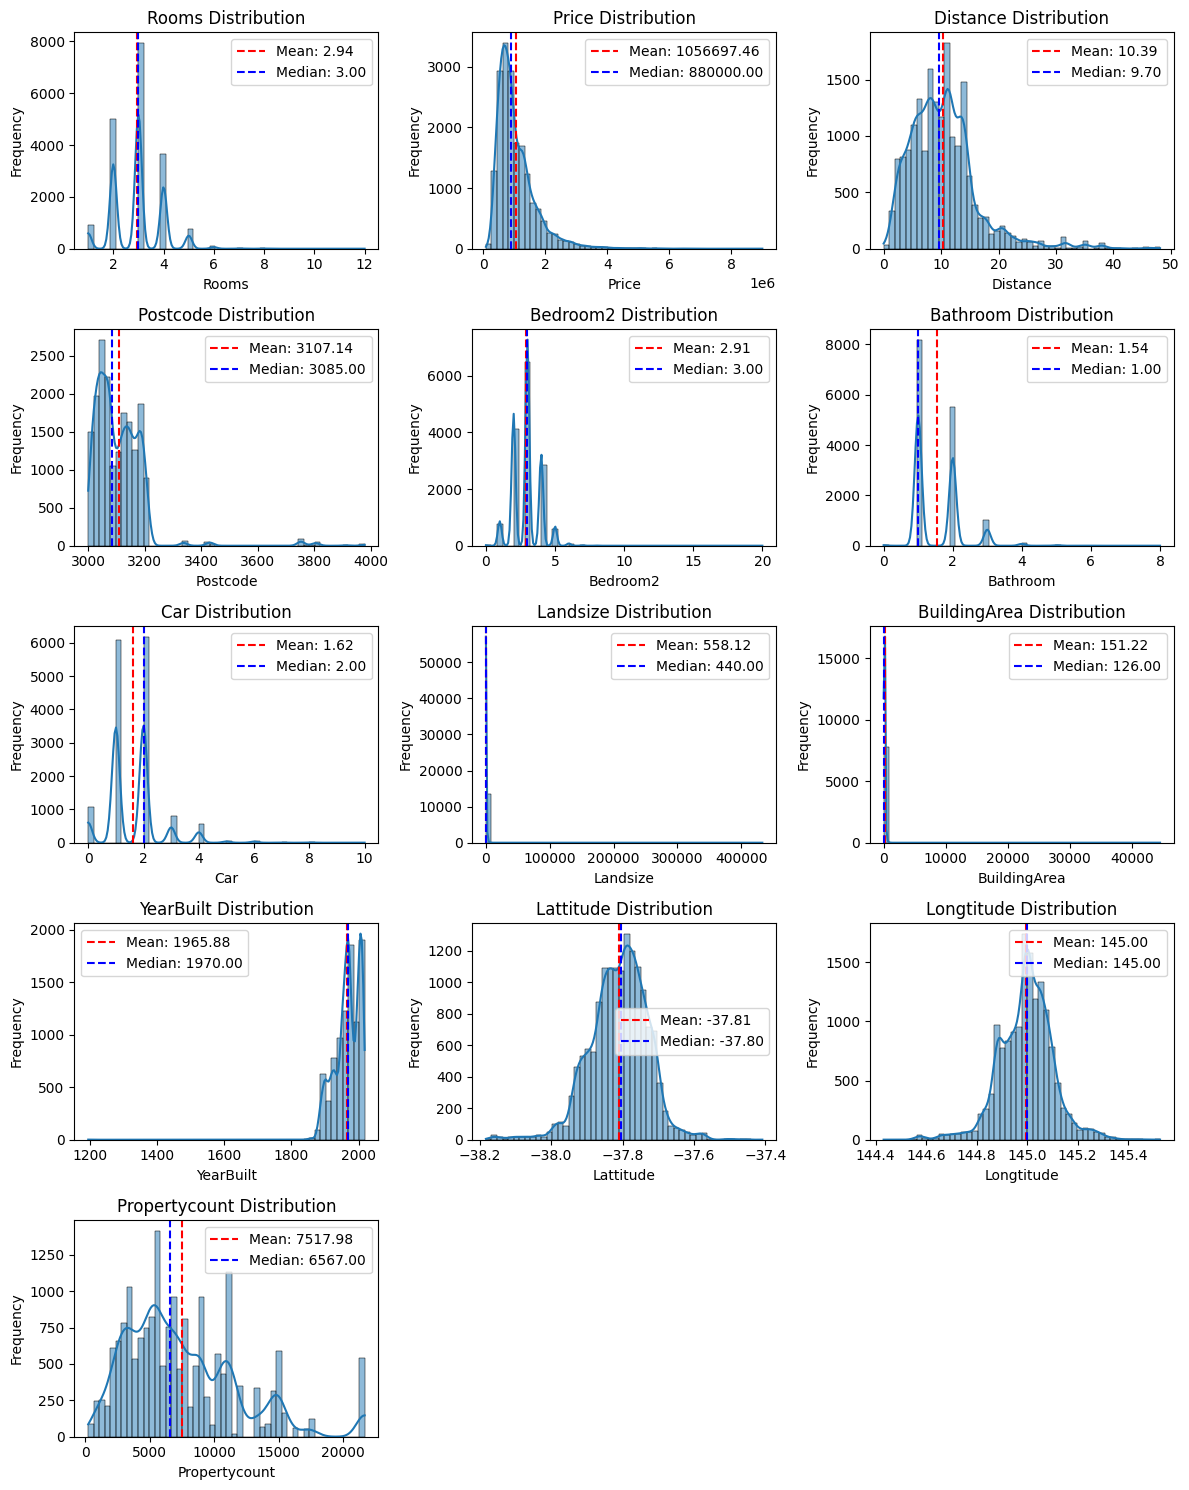

In [ ]:
def num_plot(df, num_col):

    fig_num, axes_num = plt.subplots(5, 3, figsize=(12, 15))
    axes_num = axes_num.flatten()

    for i_n, col_n in enumerate(num_col):
        ax_num = axes_num[i_n]

        sns.histplot(df[col_n], kde=True, bins=50, ax=ax_num)

        mean_num = df[col_n].mean()
        median_num = df[col_n].median()

        ax_num.axvline(mean_num, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_num:.2f}')
        ax_num.axvline(median_num, color='blue', linestyle='--', linewidth=1.5, label=f'Median: {median_num:.2f}')

        ax_num.set_title(f'{col_n} Distribution')
        ax_num.set_xlabel(f'{col_n}')
        ax_num.set_ylabel(f'Frequency')
        ax_num.legend()


    for j in range(len(num_col), len(axes_num)):
        fig_num.delaxes(axes_num[j])

    plt.tight_layout()
    plt.show()

num_plot(df, num_col)

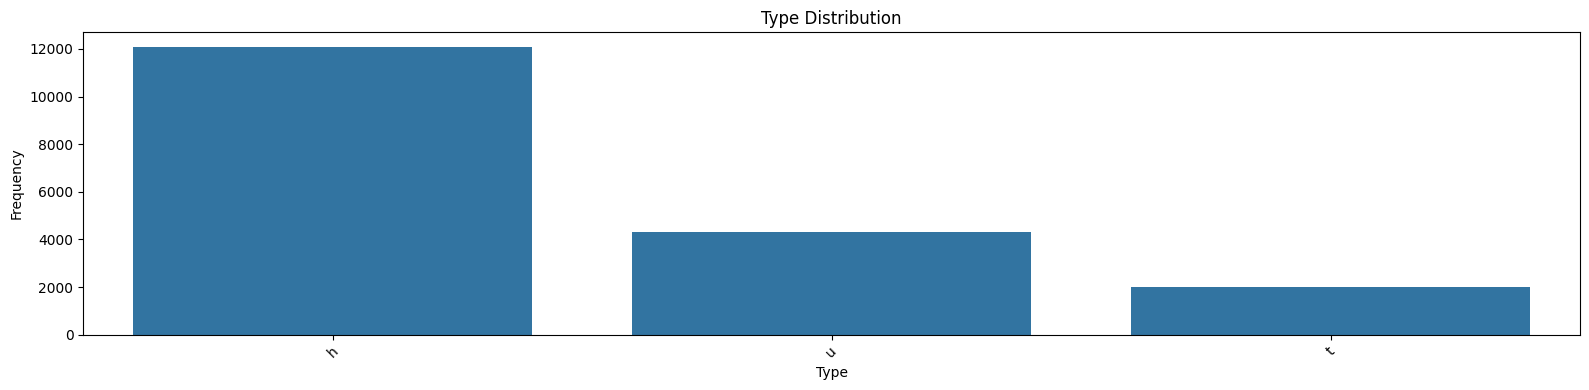

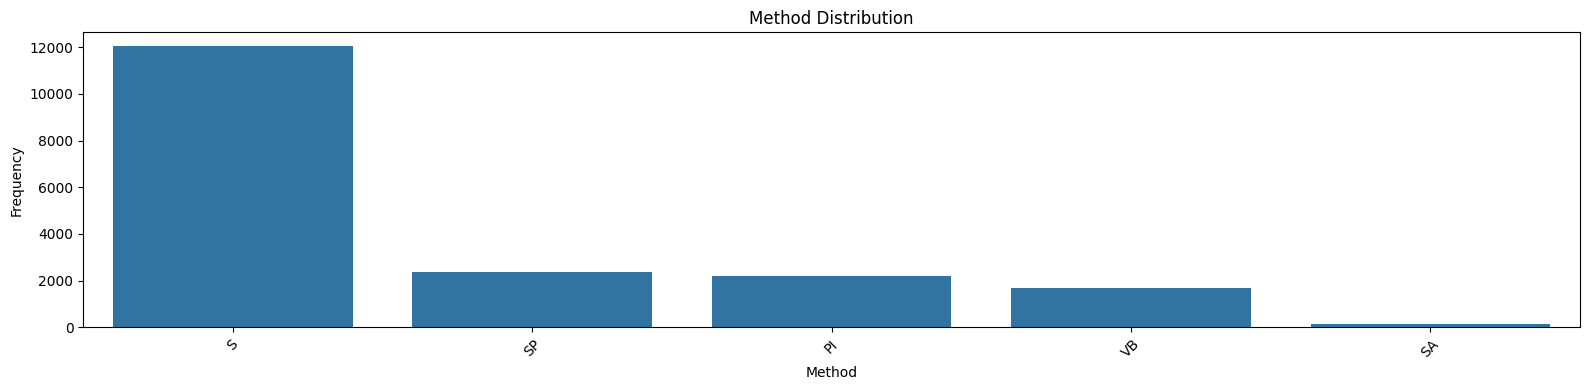

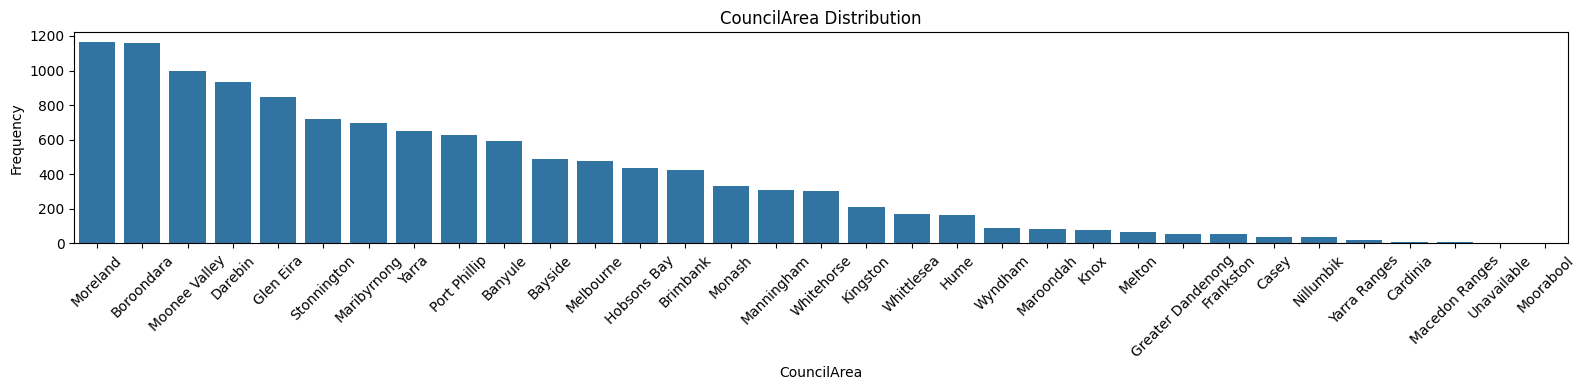

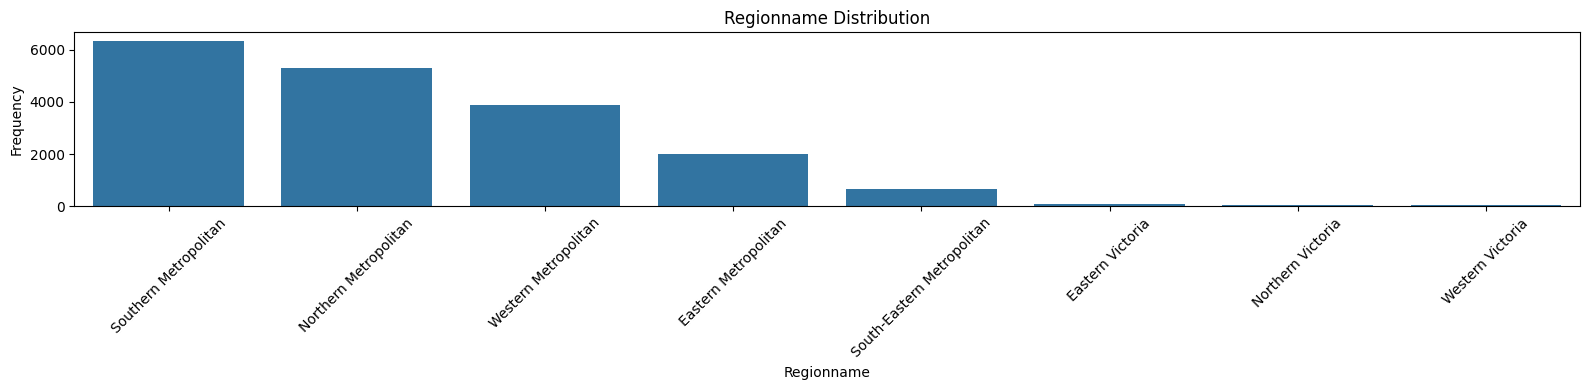

In [ ]:
selected_col = ['Type', 'Method', 'CouncilArea', 'Regionname']

def cat_plot(df, viz_col):
    for col_c in viz_col:
        plt.figure(figsize=(16, 4))

        sns.countplot(data=df, x=col_c, order=df[col_c].value_counts().index)

        plt.title(f'{col_c} Distribution')
        plt.xlabel(f'{col_c}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

cat_plot(df, selected_col)

#Train Set and Test Set Spliting

In [ ]:
print("Dataset features: ", df.columns.tolist())
X = df.drop('Price', axis=1)
y = df['Price']

print("\nFeature list: ", X.columns.tolist())

X['Postcode'] = X['Postcode'].astype(object)

Dataset features:  ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']

Feature list:  ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Method         18396 non-null  object 
 5   SellerG        18396 non-null  object 
 6   Date           18396 non-null  object 
 7   Distance       18395 non-null  float64
 8   Postcode       18395 non-null  object 
 9   Bedroom2       14927 non-null  float64
 10  Bathroom       14925 non-null  float64
 11  Car            14820 non-null  float64
 12  Landsize       13603 non-null  float64
 13  BuildingArea   7762 non-null   float64
 14  YearBuilt      8958 non-null   float64
 15  CouncilArea    12233 non-null  object 
 16  Lattitude      15064 non-null  float64
 17  Longtitude     15064 non-null  float64
 18  Region

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15636, 20)
Shape of y_train: (15636,)
Shape of X_test: (2760, 20)
Shape of y_test: (2760,)


In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Shape of X_train_split:", X_train_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train_split: (14072, 20)
Shape of y_train_split: (14072,)
Shape of X_val: (1564, 20)
Shape of y_val: (1564,)


In [ ]:
X.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
features_num_list = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_cat_list = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", features_num_list)
print("Number of numerical features: ", len(features_num_list))
print("\nCategorical features:", features_cat_list)
print("Number of categorical features: ", len(features_cat_list))

Numerical features: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Number of numerical features:  11

Categorical features: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Regionname']
Number of categorical features:  9


In [ ]:
X_train_split.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12244,Hoppers Crossing,95 Dowling Av,5,h,S,hockingstuart,17/06/2017,18.4,3029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,13830.0
16485,Essendon,3/157 Deakin St,3,t,VB,Nelson,16/09/2017,7.5,3040.0,3.0,1.0,1.0,116.0,NaN,2001.0,NaN,-37.73899,144.89291,Western Metropolitan,9264.0
14503,Maribyrnong,403/77 Village Wy,2,u,VB,Woodards,15/07/2017,4.3,3032.0,2.0,1.0,2.0,0.0,93.0,2003.0,Maribyrnong,-37.77117,144.88041,Western Metropolitan,4918.0
13580,Carnegie,11 Beena Av,3,h,SP,Woodards,8/07/2017,10.1,3163.0,3.0,1.0,1.0,684.0,NaN,NaN,Glen Eira,-37.88910,145.06337,Southern Metropolitan,7822.0
8702,Carlton,30/188 Faraday St,2,u,S,Nelson,28/05/2016,1.8,3053.0,2.0,1.0,1.0,0.0,63.0,1999.0,Melbourne,-37.79860,144.96820,Northern Metropolitan,6786.0


In [ ]:
X_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14072 entries, 12244 to 17045
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         14072 non-null  object 
 1   Address        14072 non-null  object 
 2   Rooms          14072 non-null  int64  
 3   Type           14072 non-null  object 
 4   Method         14072 non-null  object 
 5   SellerG        14072 non-null  object 
 6   Date           14072 non-null  object 
 7   Distance       14071 non-null  float64
 8   Postcode       14071 non-null  object 
 9   Bedroom2       11399 non-null  float64
 10  Bathroom       11397 non-null  float64
 11  Car            11317 non-null  float64
 12  Landsize       10379 non-null  float64
 13  BuildingArea   5958 non-null   float64
 14  YearBuilt      6884 non-null   float64
 15  CouncilArea    9329 non-null   object 
 16  Lattitude      11509 non-null  float64
 17  Longtitude     11509 non-null  float64
 18  Regionn

#Categorical Features Handling

##Transforming

In [ ]:
unique_counts_df = pd.DataFrame({
    'Categorical Features': features_cat_list,
    'Unique in X': [X[col].nunique() for col in features_cat_list],
    'Unique in X_train_split': [X_train_split[col].nunique() for col in features_cat_list],
    'Different': [(X[col].nunique() - X_train_split[col].nunique())/X[col].nunique() for col in features_cat_list]
})

unique_counts_df.set_index('Categorical Features', inplace=True)
unique_counts_df

,Unique in X,Unique in X_train_split,Different
Categorical Features,,,
Suburb,330,318,0.036364
Address,18134,13917,0.232547
Type,3,3,0.000000
Method,5,5,0.000000
SellerG,305,290,0.049180
Date,58,58,0.000000
Postcode,205,198,0.034146
CouncilArea,33,32,0.030303
Regionname,8,8,0.000000


In [ ]:
X_train_split['Date'] = pd.to_datetime(X_train_split['Date'], format='%d/%m/%Y')
# X_train_split['Quarter'] = X_train_split['Date'].dt.quarter
# X_train_split['Quarter'] = X_train_split['Date'].dt.to_period('Q').astype(str)

X_train_split['Year_Month'] = X_train_split['Date'].dt.to_period('M').astype(str)

YM = X_train_split['Year_Month'].nunique()
print(f"Number of unique Year_Month: {YM}")
X_train_split['Year_Month'].dtype

Number of unique Year_Month: 19


dtype('O')

In [ ]:
X_val['Date'] = pd.to_datetime(X_val['Date'], format='%d/%m/%Y')
# X_val['Quarter'] = X_val['Date'].dt.quarter
# X_val['Quarter'] = X_val['Date'].dt.to_period('Q').astype(str)

X_val['Year_Month'] = X_val['Date'].dt.to_period('M').astype(str)

YM = X_val['Year_Month'].nunique()
print(f"Number of unique Year_Month: {YM}")
X_val['Year_Month'].dtype

Number of unique Year_Month: 18


dtype('O')

In [ ]:
X_test['Date'] = pd.to_datetime(X_test['Date'], format='%d/%m/%Y')
# X_test['Quarter'] = X_test['Date'].dt.quarter
# X_test['Quarter'] = X_test['Date'].dt.to_period('Q').astype(str)

X_test['Year_Month'] = X_test['Date'].dt.to_period('M').astype(str)

YM = X_test['Year_Month'].nunique()
print(f"Number of unique Year_Month: {YM}")
X_test['Year_Month'].dtype

Number of unique Year_Month: 18


dtype('O')

In [ ]:
# cat_plot(df=X_train_split, viz_col=['Year_Month'])

In [ ]:
# cat_plot(df=X_val, viz_col=['Year_Month'])

In [ ]:
# cat_plot(df=X_test, viz_col=['Year_Month'])

In [ ]:
X_train_split['Street_Name'] = X_train_split['Address'].apply(lambda x: ' '.join(x.split(' ')[1:]))
X_train_split['Street_Name'].head()

,Street_Name
12244,Dowling Av
16485,Deakin St
14503,Village Wy
13580,Beena Av
8702,Faraday St


In [ ]:
X_train_split['Street_Name'].nunique()

5883

In [ ]:
X_train_split = X_train_split.drop(['Address', 'Street_Name', 'SellerG', 'Suburb', 'Date', 'Postcode'], axis=1)
X_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14072 entries, 12244 to 17045
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          14072 non-null  int64  
 1   Type           14072 non-null  object 
 2   Method         14072 non-null  object 
 3   Distance       14071 non-null  float64
 4   Bedroom2       11399 non-null  float64
 5   Bathroom       11397 non-null  float64
 6   Car            11317 non-null  float64
 7   Landsize       10379 non-null  float64
 8   BuildingArea   5958 non-null   float64
 9   YearBuilt      6884 non-null   float64
 10  CouncilArea    9329 non-null   object 
 11  Lattitude      11509 non-null  float64
 12  Longtitude     11509 non-null  float64
 13  Regionname     14071 non-null  object 
 14  Propertycount  14071 non-null  float64
 15  Year_Month     14072 non-null  object 
dtypes: float64(10), int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
X_val = X_val.drop(['Address', 'SellerG', 'Suburb', 'Date', 'Postcode'], axis=1)

In [ ]:
X_test = X_test.drop(['Address', 'SellerG', 'Suburb', 'Date', 'Postcode'], axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 11086 to 14750
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          2760 non-null   int64  
 1   Type           2760 non-null   object 
 2   Method         2760 non-null   object 
 3   Distance       2760 non-null   float64
 4   Bedroom2       2259 non-null   float64
 5   Bathroom       2259 non-null   float64
 6   Car            2242 non-null   float64
 7   Landsize       2079 non-null   float64
 8   BuildingArea   1141 non-null   float64
 9   YearBuilt      1313 non-null   float64
 10  CouncilArea    1887 non-null   object 
 11  Lattitude      2275 non-null   float64
 12  Longtitude     2275 non-null   float64
 13  Regionname     2760 non-null   object 
 14  Propertycount  2760 non-null   float64
 15  Year_Month     2760 non-null   object 
dtypes: float64(10), int64(1), object(5)
memory usage: 366.6+ KB


In [ ]:
features_num_train_split = X_train_split.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_cat_train_split = X_train_split.select_dtypes(include=['object']).columns.tolist()

features_num_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_cat_test = X_test.select_dtypes(include=['object']).columns.tolist()

In [ ]:
print(features_cat_train_split)

['Type', 'Method', 'CouncilArea', 'Regionname', 'Year_Month']


In [ ]:
print(features_cat_test)

['Type', 'Method', 'CouncilArea', 'Regionname', 'Year_Month']


In [ ]:
X_train_split.isnull().sum()[X_train_split.isnull().sum() > 0]

,0
Distance,1
Bedroom2,2673
Bathroom,2675
Car,2755
Landsize,3693
BuildingArea,8114
YearBuilt,7188
CouncilArea,4743
Lattitude,2563
Longtitude,2563


In [ ]:
X_val.isnull().sum()[X_val.isnull().sum() > 0]

,0
Bedroom2,295
Bathroom,295
Car,303
Landsize,419
BuildingArea,901
YearBuilt,803
CouncilArea,547
Lattitude,284
Longtitude,284


In [ ]:
X_test.isnull().sum()[X_test.isnull().sum() > 0]

,0
Bedroom2,501
Bathroom,501
Car,518
Landsize,681
BuildingArea,1619
YearBuilt,1447
CouncilArea,873
Lattitude,485
Longtitude,485


In [ ]:
X_train_split['CouncilArea'] = X_train_split['CouncilArea'].fillna('Others')
X_train_split['Regionname'] = X_train_split['Regionname'].fillna('Other')

In [ ]:
X_train_split['CouncilArea'].isnull().sum()

np.int64(0)

In [ ]:
X_train_split['Regionname'].isnull().sum()

np.int64(0)

In [ ]:
X_val['CouncilArea'] = X_val['CouncilArea'].fillna('Others')
X_val['Regionname'] = X_val['Regionname'].fillna('Other')

In [ ]:
X_val['CouncilArea'].isnull().sum()

np.int64(0)

In [ ]:
X_val['Regionname'].isnull().sum()

np.int64(0)

In [ ]:
X_test['CouncilArea'] = X_test['CouncilArea'].fillna('Others')
X_test['Regionname'] = X_test['Regionname'].fillna('Other')

In [ ]:
X_test['CouncilArea'].isnull().sum()

np.int64(0)

In [ ]:
X_test['Regionname'].isnull().sum()

np.int64(0)

In [ ]:
X_train_split.isnull().sum()[X_train_split.isnull().sum() > 0]

,0
Distance,1
Bedroom2,2673
Bathroom,2675
Car,2755
Landsize,3693
BuildingArea,8114
YearBuilt,7188
Lattitude,2563
Longtitude,2563
Propertycount,1


In [ ]:
X_val.isnull().sum()[X_val.isnull().sum() > 0]

,0
Bedroom2,295
Bathroom,295
Car,303
Landsize,419
BuildingArea,901
YearBuilt,803
Lattitude,284
Longtitude,284


In [ ]:
X_test['CouncilArea'].value_counts(dropna=False)

,count
CouncilArea,
Others,873
Boroondara,172
Moreland,169
Moonee Valley,161
Glen Eira,133
Darebin,132
Stonnington,126
Maribyrnong,114
Port Phillip,109


In [ ]:
X_test['CouncilArea'] = X_test['CouncilArea'].replace('Unavailable', 'Others')

In [ ]:
X_test.isnull().sum()[X_test.isnull().sum() > 0]

,0
Bedroom2,501
Bathroom,501
Car,518
Landsize,681
BuildingArea,1619
YearBuilt,1447
Lattitude,485
Longtitude,485


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1564 entries, 6182 to 15484
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          1564 non-null   int64  
 1   Type           1564 non-null   object 
 2   Method         1564 non-null   object 
 3   Distance       1564 non-null   float64
 4   Bedroom2       1269 non-null   float64
 5   Bathroom       1269 non-null   float64
 6   Car            1261 non-null   float64
 7   Landsize       1145 non-null   float64
 8   BuildingArea   663 non-null    float64
 9   YearBuilt      761 non-null    float64
 10  CouncilArea    1564 non-null   object 
 11  Lattitude      1280 non-null   float64
 12  Longtitude     1280 non-null   float64
 13  Regionname     1564 non-null   object 
 14  Propertycount  1564 non-null   float64
 15  Year_Month     1564 non-null   object 
dtypes: float64(10), int64(1), object(5)
memory usage: 207.7+ KB


##One-hot Encoding

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

train_split_encoded_array = encoder.fit_transform(X_train_split[features_cat_train_split])

train_split_encoded_cols = encoder.get_feature_names_out(features_cat_train_split)
features_cat_encoded = train_split_encoded_cols.tolist()

train_split_encoded_df = pd.DataFrame(train_split_encoded_array, columns=train_split_encoded_cols, index=X_train_split.index)

X_train_split = pd.concat([X_train_split, train_split_encoded_df], axis=1)

for col in features_cat_train_split:
    X_train_split.drop(columns=col, inplace=True)

In [ ]:
val_encoded_array = encoder.transform(X_val[features_cat_train_split])

val_encoded_cols = encoder.get_feature_names_out(features_cat_train_split)

val_encoded_df = pd.DataFrame(val_encoded_array, columns=val_encoded_cols, index=X_val.index)

X_val = pd.concat([X_val, val_encoded_df], axis=1)

for col in features_cat_train_split:
    X_val.drop(columns=col, inplace=True)

In [ ]:
test_encoded_array = encoder.transform(X_test[features_cat_test])

test_encoded_cols = encoder.get_feature_names_out(features_cat_test)

test_encoded_df = pd.DataFrame(test_encoded_array, columns=test_encoded_cols, index=X_test.index)

X_test = pd.concat([X_test, test_encoded_df], axis=1)

for col in features_cat_test:
    X_test.drop(columns=col, inplace=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}
# for col in features_cat_train_split:
#     label_encoders[col] = LabelEncoder()
#     X_train_split[col] = label_encoders[col].fit_transform(X_train_split[col])

In [ ]:
X_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14072 entries, 12244 to 17045
Data columns (total 75 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  14072 non-null  int64  
 1   Distance                               14071 non-null  float64
 2   Bedroom2                               11399 non-null  float64
 3   Bathroom                               11397 non-null  float64
 4   Car                                    11317 non-null  float64
 5   Landsize                               10379 non-null  float64
 6   BuildingArea                           5958 non-null   float64
 7   YearBuilt                              6884 non-null   float64
 8   Lattitude                              11509 non-null  float64
 9   Longtitude                             11509 non-null  float64
 10  Propertycount                          14071 non-null  float64
 11  Typ

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 11086 to 14750
Data columns (total 75 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  2760 non-null   int64  
 1   Distance                               2760 non-null   float64
 2   Bedroom2                               2259 non-null   float64
 3   Bathroom                               2259 non-null   float64
 4   Car                                    2242 non-null   float64
 5   Landsize                               2079 non-null   float64
 6   BuildingArea                           1141 non-null   float64
 7   YearBuilt                              1313 non-null   float64
 8   Lattitude                              2275 non-null   float64
 9   Longtitude                             2275 non-null   float64
 10  Propertycount                          2760 non-null   float64
 11  Type

#Numerical Features Handling

##Filling missing value

In [ ]:
train_split_null_features = list(X_train_split.isnull().sum()[X_train_split.isnull().sum() > 0].index)
train_split_null_features

['Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [ ]:
test_null_features = list(X_test.isnull().sum()[X_test.isnull().sum() > 0].index)
test_null_features

['Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude']

In [ ]:
for col in train_split_null_features:
    median_val = X_train_split[col].median()
    X_train_split[col] = X_train_split[col].fillna(median_val)

In [ ]:
for col in train_split_null_features:
    median_val = X_train_split[col].median()
    X_val[col] = X_val[col].fillna(median_val)

In [ ]:
for col in test_null_features:
    median_val = X_train_split[col].median()
    X_test[col] = X_test[col].fillna(median_val)

In [ ]:
X_train_split.isnull().sum()[X_train_split.isnull().sum() > 0]

,0


In [ ]:
X_val.isnull().sum()[X_val.isnull().sum() > 0]

,0


In [ ]:
X_test.isnull().sum()[X_test.isnull().sum() > 0]

,0


##Handling Outlier

In [ ]:
X_train_split.dtypes.unique()

In [ ]:
def skew_comp(df, col):
    skew_values = df[col].apply(lambda x: skew(x.dropna()))
    skew_list = skew_values.to_dict()
    print(skew_values.sort_values(ascending=False))

    return skew_list

skew_features_train_split = skew_comp(X_train_split, features_num_train_split)

BuildingArea     109.652966
Landsize         102.274882
Bathroom           1.656515
Distance           1.612311
Car                1.222243
Propertycount      1.069035
Bedroom2           0.894047
Rooms              0.484587
Longtitude        -0.313163
Lattitude         -0.507359
YearBuilt         -1.044140
dtype: float64


In [ ]:
skew_features_split = skew_comp(X_val, features_num_train_split)

Landsize         21.399173
BuildingArea      5.968599
Bathroom          1.949225
Distance          1.756532
Car               1.673102
Propertycount     1.114969
Rooms             0.613509
Bedroom2          0.389618
Longtitude       -0.176084
Lattitude        -0.642478
YearBuilt        -1.023861
dtype: float64


In [ ]:
skew_features_test = skew_comp(X_test, features_num_test)

Landsize         24.149563
BuildingArea      3.993717
Distance          1.673155
Bathroom          1.284775
Car               1.077106
Propertycount     1.075967
Rooms             0.359678
Bedroom2          0.227666
Lattitude        -0.293637
Longtitude       -0.330429
YearBuilt        -7.473270
dtype: float64


In [ ]:
def skew_split(skew_dict):
    strong_right = []
    moderate_right = []
    symmetric = []
    moderate_left = []
    strong_left = []

    for col, skew_val in skew_dict.items():
        if skew_val > 1:
            strong_right.append(col)
        elif 0.5 < skew_val <= 1:
            moderate_right.append(col)
        elif -0.5 <= skew_val <= 0.5:
            symmetric.append(col)
        elif -1 <= skew_val < -0.5:
            moderate_left.append(col)
        else:
            strong_left.append(col)

    print("Significant right skew features: ", strong_right)
    print("Moderate right skew features: ", moderate_right)
    print("Symmetric features: ", symmetric)
    print("Moderate left skew features: ", moderate_left)
    print("Significant left skew features: ", strong_left)

    return strong_right, moderate_right, strong_left, moderate_left, symmetric

strong_right, moderate_right, strong_left, moderate_left, symmetric = skew_split(skew_features_train_split)

Significant right skew features:  ['Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']
Moderate right skew features:  ['Bedroom2']
Symmetric features:  ['Rooms', 'Longtitude']
Moderate left skew features:  ['Lattitude']
Significant left skew features:  ['YearBuilt']


In [ ]:
strong_right_1, moderate_right_1, strong_left_1, moderate_left_1, symmetric_1 = skew_split(skew_features_split)

Significant right skew features:  ['Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']
Moderate right skew features:  ['Rooms']
Symmetric features:  ['Bedroom2', 'Longtitude']
Moderate left skew features:  ['Lattitude']
Significant left skew features:  ['YearBuilt']


In [ ]:
strong_right_2, moderate_right_2, strong_left_2, moderate_left_2, symmetric_2 = skew_split(skew_features_test)

Significant right skew features:  ['Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']
Moderate right skew features:  []
Symmetric features:  ['Rooms', 'Bedroom2', 'Lattitude', 'Longtitude']
Moderate left skew features:  []
Significant left skew features:  ['YearBuilt']


In [ ]:
(X_train_split[strong_right] <= 0).sum()

,0
Distance,19
Bathroom,26
Car,806
Landsize,1504
BuildingArea,18
Propertycount,0


In [ ]:
pt_dict = {}
for col in strong_right:
    pt = PowerTransformer(method='yeo-johnson')
    X_train_split[[col]] = pt.fit_transform(X_train_split[[col]])
    pt_dict[col] = pt
for col in moderate_right:
    pt = PowerTransformer(method='yeo-johnson')
    X_train_split[[col]] = pt.fit_transform(X_train_split[[col]])
    pt_dict[col] = pt
for col in moderate_left:
    pt = PowerTransformer(method='yeo-johnson')
    X_train_split[[col]] = pt.fit_transform(X_train_split[[col]])
    pt_dict[col] = pt

In [ ]:
for col in strong_right_2:
    if col in pt_dict:
        X_val[[col]] = pt_dict[col].transform(X_val[[col]])
        X_test[[col]] = pt_dict[col].transform(X_test[[col]])
    else:
        pass

for col in moderate_right_2:
    if col in pt_dict:
        X_val[[col]] = pt_dict[col].transform(X_val[[col]])
        X_test[[col]] = pt_dict[col].transform(X_test[[col]])
    else:
        pass

for col in moderate_left_2:
    if col in pt_dict:
        X_val[[col]] = pt_dict[col].transform(X_val[[col]])
        X_test[[col]] = pt_dict[col].transform(X_test[[col]])
    else:
        pass

In [ ]:
skew_features_train_split_after = skew_comp(X_train_split, features_num_train_split)

BuildingArea     1.179212
Landsize         1.178719
Rooms            0.484587
Bedroom2         0.108622
Car              0.088002
Distance         0.012853
Propertycount   -0.010839
Bathroom        -0.151471
Longtitude      -0.313163
Lattitude       -0.416104
YearBuilt       -1.044140
dtype: float64


In [ ]:
skew_features_split_after = skew_comp(X_val, features_num_train_split)

Landsize         0.872822
Rooms            0.613509
Bedroom2         0.389618
Bathroom         0.388152
Car              0.356417
Distance         0.110603
Propertycount    0.056112
Longtitude      -0.176084
Lattitude       -0.642478
BuildingArea    -0.694723
YearBuilt       -1.023861
dtype: float64


In [ ]:
skew_features_test_after = skew_comp(X_test, features_num_test)

Landsize         0.388233
Rooms            0.359678
Bedroom2         0.227666
Distance        -0.000798
Car             -0.009882
Propertycount   -0.061485
Lattitude       -0.293637
Longtitude      -0.330429
Bathroom        -0.444809
BuildingArea    -0.618890
YearBuilt       -7.473270
dtype: float64


In [ ]:
a = skew_split(skew_features_train_split_after)

Significant right skew features:  ['Landsize', 'BuildingArea']
Moderate right skew features:  []
Symmetric features:  ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Lattitude', 'Longtitude', 'Propertycount']
Moderate left skew features:  []
Significant left skew features:  ['YearBuilt']


In [ ]:
b = skew_split(skew_features_split_after)

Significant right skew features:  []
Moderate right skew features:  ['Rooms', 'Landsize']
Symmetric features:  ['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Longtitude', 'Propertycount']
Moderate left skew features:  ['BuildingArea', 'Lattitude']
Significant left skew features:  ['YearBuilt']


In [ ]:
c = skew_split(skew_features_test_after)

Significant right skew features:  []
Moderate right skew features:  []
Symmetric features:  ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
Moderate left skew features:  ['BuildingArea']
Significant left skew features:  ['YearBuilt']


##Scaling

In [ ]:
features_num_train_split

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [ ]:
features_num_test

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [ ]:
rb_scaler = RobustScaler()
X_train_split[features_num_train_split] = rb_scaler.fit_transform(X_train_split[features_num_train_split])

In [ ]:
X_val[features_num_train_split] = rb_scaler.transform(X_val[features_num_train_split])

In [ ]:
X_test[features_num_test] = rb_scaler.transform(X_test[features_num_test])

In [ ]:
X_train_split.drop('YearBuilt', axis=1, inplace=True)
X_val.drop('YearBuilt', axis=1, inplace=True)
X_test.drop('YearBuilt', axis=1, inplace=True)

In [ ]:
features_num_train_split.remove('YearBuilt')
features_num_test.remove('YearBuilt')

#Feature Selection

## Correlation Matrix

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64'])

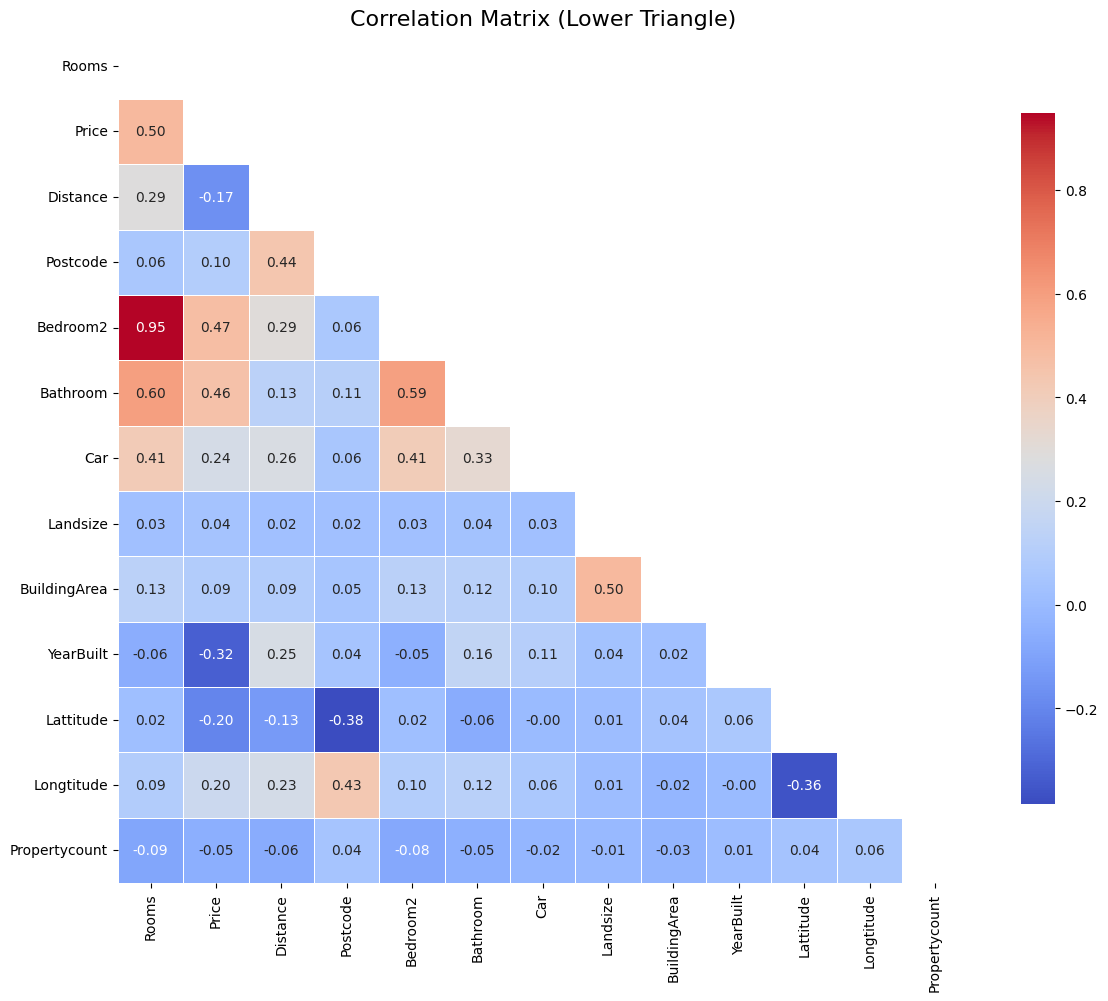

/tmp/ipython-input-1469729762.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_signed.values, y=top_features_signed.index, palette="coolwarm")


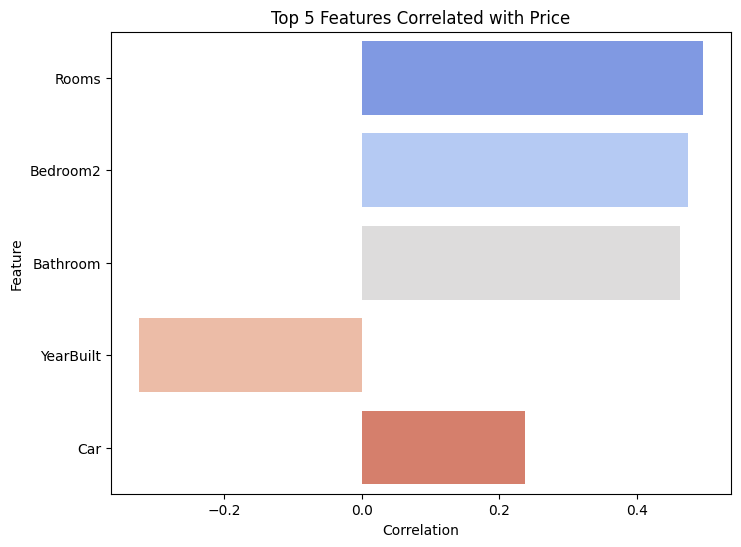

In [ ]:
def corr_matrix(df, n=5):
    corr = df.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    corr_target = corr["Price"].drop("Price")

    top_features = corr_target.abs().sort_values(ascending=False).head(n)
    top_features_signed = corr_target.loc[top_features.index]

    plt.figure(figsize=(12, 10))


    sns.heatmap(
        corr,
        mask=mask,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title('Correlation Matrix (Lower Triangle)', fontsize=16)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,6))
    sns.barplot(x=top_features_signed.values, y=top_features_signed.index, palette="coolwarm")
    plt.title(f"Top {n} Features Correlated with Price")
    plt.xlabel("Correlation")
    plt.ylabel("Feature")
    plt.show()


corr_matrix(num_cols,5)

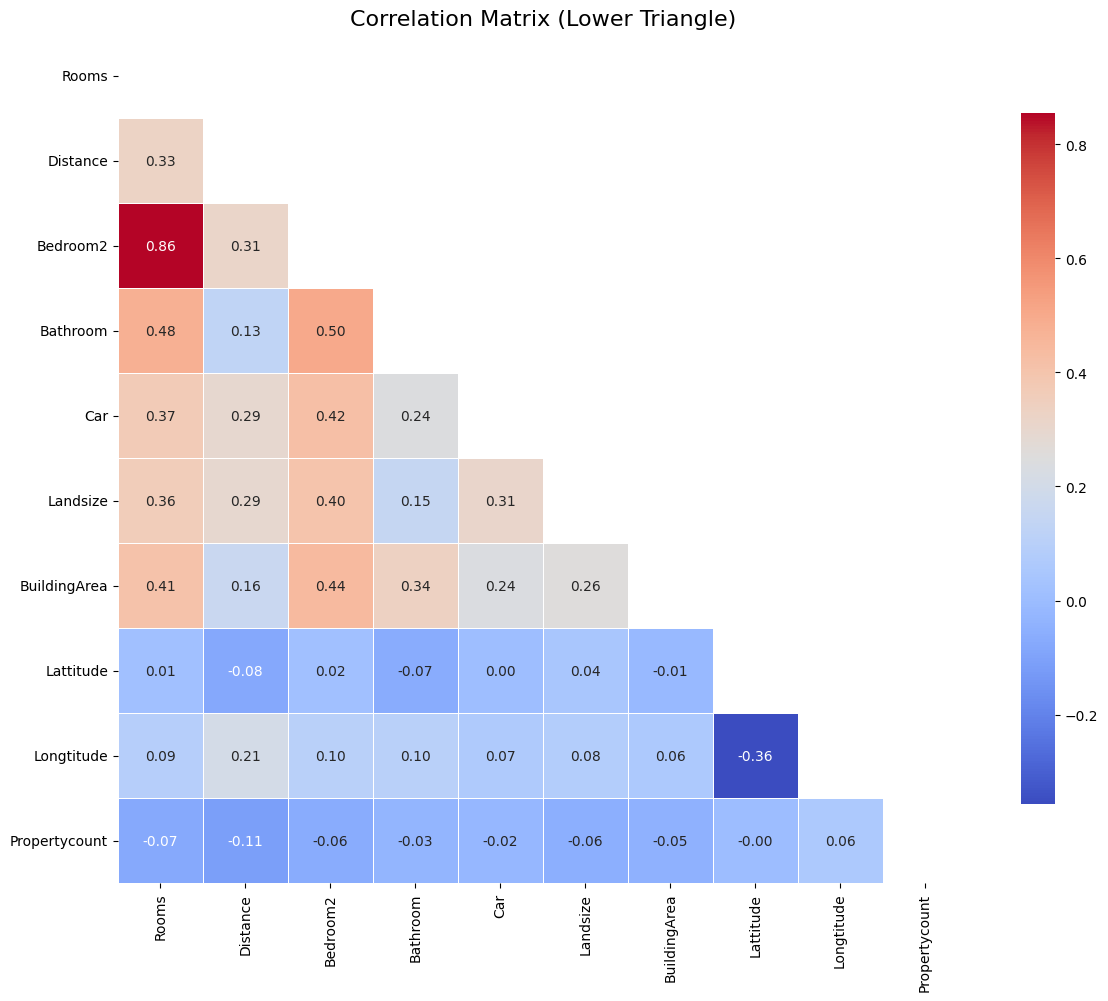

In [ ]:
def corr_matrix(df, col):
    corr = df[col].corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 10))

    sns.heatmap(
        corr,
        mask=mask,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title('Correlation Matrix (Lower Triangle)', fontsize=16)
    plt.tight_layout()
    plt.show()

corr_matrix(X_train_split, features_num_train_split)

In [ ]:
corr_matrix(X_val, features_num_train_split)

In [ ]:
corr_matrix(X_test, features_num_test)

In [ ]:
def vif_test(df, col):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools.tools import add_constant

    X_vif = X_train_split[features_num_train_split].copy()
    X_vif = add_constant(X_vif)

    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                      for i in range(X_vif.shape[1])]

    print(vif_data)

vif_test(X_train_split, features_num_train_split)

          Feature       VIF
0           const  1.981278
1           Rooms  3.849093
2        Distance  1.255509
3        Bedroom2  4.259572
4        Bathroom  1.402221
5             Car  1.293592
6        Landsize  1.280311
7    BuildingArea  1.290649
8       Lattitude  1.161593
9      Longtitude  1.058205
10  Propertycount  1.022965


##PCA

In [ ]:
pca = PCA()
X_pca_full = pca.fit_transform(X_train_split[features_num_train_split])

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 7


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features_num_train_split
)

top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
print("Top contributing features to PC1:\n", top_features_pc1)

Top contributing features to PC1:
 Landsize         5.899419e-01
Rooms            4.528846e-01
Bedroom2         4.059526e-01
BuildingArea     3.510442e-01
Car              2.685020e-01
Distance         2.152167e-01
Bathroom         1.552877e-01
Longtitude       1.212036e-01
Propertycount    4.022917e-02
Lattitude        1.431104e-18
Name: PC1, dtype: float64


In [ ]:
feature_importance = loadings.iloc[:, :n_components_95].abs().sum(axis=1)

selected_features = feature_importance.sort_values(ascending=False)

final_selected_features = selected_features.head(n_components_95).index.tolist()
print(final_selected_features)

X_train_split = pd.concat([
    X_train_split.drop(columns=features_num_train_split),
    X_train_split[final_selected_features]
], axis=1)

['Car', 'BuildingArea', 'Distance', 'Propertycount', 'Rooms', 'Landsize', 'Longtitude']


In [ ]:
# pca = PCA(n_components=n_components_95)
# X_pca_train_split = pca.fit_transform(X_train_split[features_num_train_split])

# X_pca_train_split_df = pd.DataFrame(X_pca_train_split, columns=[f'PC{i+1}' for i in range(n_components_95)], index=X_train_split.index)

# X_train_split = pd.concat([
#     X_train_split.drop(columns=features_num_train_split),
#     X_pca_train_split_df
# ], axis=1)

In [ ]:
# X_train_split.info()

In [ ]:
# X_val_pca = pca.transform(X_val[features_num_train_split])

# X_val_pca_df = pd.DataFrame(X_val_pca, columns=[f'PC{i+1}' for i in range(n_components_95)], index=X_val.index)

# X_val = pd.concat([
#     X_val.drop(columns=features_num_train_split),
#     X_val_pca_df
# ], axis=1)

In [ ]:
# X_test_pca = pca.transform(X_test[features_num_test])

# X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components_95)], index=X_test.index)

# X_test = pd.concat([
#     X_test.drop(columns=features_num_test),
#     X_test_pca_df
# ], axis=1)

In [ ]:
X_val = pd.concat([
    X_val.drop(columns=features_num_train_split),
    X_val[final_selected_features]
], axis=1)

In [ ]:
# X_val.info()

In [ ]:
X_test = pd.concat([
    X_test.drop(columns=features_num_test),
    X_test[final_selected_features]
], axis=1)

In [ ]:
# X_test.info()

##Truncated SVD

In [ ]:
# X_cat_train_split = X_train_split[features_cat_encoded]

# svd = TruncatedSVD(n_components=10, random_state=42)
# X_svd_train_split = svd.fit_transform(X_cat_train_split)

# X_svd_train_split_df = pd.DataFrame(X_svd_train_split, columns=[f'SVD{i+1}' for i in range(10)], index=X_train_split.index)

# X_train_split = pd.concat([
#     X_train_split.drop(columns=features_cat_encoded),
#     X_svd_train_split_df
# ], axis=1)

In [ ]:
# X_train_split.info()

In [ ]:
# X_cat_val = X_val[features_cat_encoded]

# X_svd_val = svd.transform(X_cat_val)

# X_svd_val_df = pd.DataFrame(X_svd_val, columns=[f'SVD{i+1}' for i in range(10)], index=X_val.index)

# X_val = pd.concat([
#     X_val.drop(columns=features_cat_encoded),
#     X_svd_val_df
# ], axis=1)

In [ ]:
# X_val.info()

In [ ]:
# X_cat_test = X_test[features_cat_encoded]

# X_svd_test = svd.transform(X_cat_test)

# X_svd_test_df = pd.DataFrame(X_svd_test, columns=[f'SVD{i+1}' for i in range(10)], index=X_test.index)

# X_test = pd.concat([
#     X_test.drop(columns=features_cat_encoded),
#     X_svd_test_df
# ], axis=1)

In [ ]:
# X_test.info()

#Hyperparameter Tuning

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective_ridge(trial):
    alpha_ridge = trial.suggest_float('alpha', 1e-5, 1e3)

    ridge = Ridge(alpha=alpha_ridge)
    scores_ridge = cross_val_score(ridge, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
    return -np.mean(scores_ridge)

study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=50)

best_alpha_ridge = study_ridge.best_params['alpha']

print("Best alpha:", study_ridge.best_params['alpha'])
print("Best CV MSE:", study_ridge.best_value)

Best alpha: 0.7000896409333737
Best CV MSE: 169488826712.2111


In [ ]:
from sklearn.linear_model import Lasso

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective_lasso(trial):
    alpha_lasso = trial.suggest_float('alpha', 1e-5, 1e3)

    lasso = Lasso(alpha=alpha_lasso)
    scores_lasso = cross_val_score(lasso, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
    return -np.mean(scores_lasso)

study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=50)

best_alpha_lasso = study_lasso.best_params['alpha']

print("Best alpha:", study_lasso.best_params['alpha'])
print("Best CV MSE:", study_lasso.best_value)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.959e+12, tolerance: 4.728e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e+13, tolerance: 4.578e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.350e+14, tolerance: 4.728e

Best alpha: 17.15602615463277
Best CV MSE: 169483400344.19696


In [ ]:
from sklearn.linear_model import ElasticNet

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective_el(trial):
    alpha_el = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    el = ElasticNet(alpha=alpha_el, l1_ratio=l1_ratio, max_iter=10000)

    scores_el = cross_val_score(el, X_train_split, y_train_split, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    return -np.mean(scores_el)

study_el = optuna.create_study(direction='minimize')
study_el.optimize(objective_el, n_trials=50, timeout=300)

best_alpha_el = study_el.best_params['alpha']
best_l1_ratio_el = study_el.best_params['l1_ratio']

print("Best alpha:", study_el.best_params['alpha'])
print("Best l1_ratio:", study_el.best_params['l1_ratio'])
print("Best CV MSE:", study_el.best_value)

Best alpha: 5.8537764797940885e-05
Best l1_ratio: 0.37868881275960775
Best CV MSE: 169557251396.52747


#Model Setup

In [ ]:
X_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14072 entries, 12244 to 17045
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_t                                 14072 non-null  float64
 1   Type_u                                 14072 non-null  float64
 2   Method_S                               14072 non-null  float64
 3   Method_SA                              14072 non-null  float64
 4   Method_SP                              14072 non-null  float64
 5   Method_VB                              14072 non-null  float64
 6   CouncilArea_Bayside                    14072 non-null  float64
 7   CouncilArea_Boroondara                 14072 non-null  float64
 8   CouncilArea_Brimbank                   14072 non-null  float64
 9   CouncilArea_Cardinia                   14072 non-null  float64
 10  CouncilArea_Casey                      14072 non-null  float64
 11  Cou

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train_split, y_train_split)

LinearRegression()

#Model Prediction

##Predicting

In [ ]:
y_pred = lin_model.predict(X_test)
y_pred

y_val_pred = lin_model.predict(X_val)
y_val_pred

array([ 751848.57104874,  736474.1777541 ,  708231.07735746, ...,
       1433683.51958199,  821001.62358808, 1162464.2635148 ])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

print(f"Validation Prediction Metrics:")
print(f"  MSE: {mse_val:.2f}")
print(f"  RMSE: {rmse_val:.2f}")
print(f"  MAE: {mae_val:.2f}")
print(f"  R2 Squared: {r2_val:.2f}")
print(f"  MAPE: {mape_val:.2f}%")

Validation Prediction Metrics:
  MSE: 143869346239.94
  RMSE: 379301.13
  MAE: 263151.68
  R2 Squared: 0.63
  MAPE: 28.94%


In [ ]:
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mape_lr = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Test Prediction Metrics:")
print(f"  MSE: {mse_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  MAE: {mae_lr:.2f}")
print(f"  R2 Squared: {r2_lr:.2f}")
print(f"  MAPE: {mape_lr:.2f}%")

Test Prediction Metrics:
  MSE: 165909155245.19
  RMSE: 407319.48
  MAE: 268346.82
  R2 Squared: 0.60
  MAPE: 28.56%


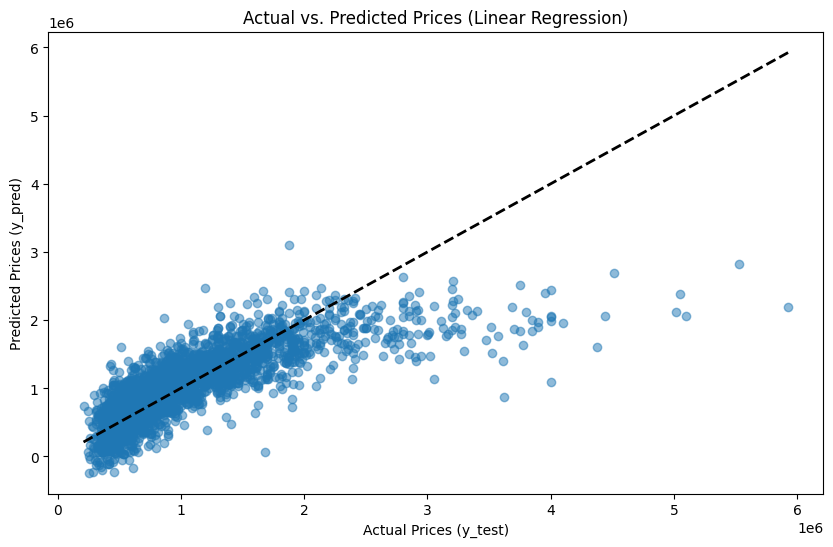

In [ ]:
def pred_result(target, pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(target, pred, alpha=0.5)
    plt.xlabel("Actual Prices (y_test)")
    plt.ylabel("Predicted Prices (y_pred)")
    plt.title("Actual vs. Predicted Prices (Linear Regression)")
    plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=2)
    plt.show()

pred_result(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_split, y_train_split)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

y_val_pred_ridge = ridge_model.predict(X_val)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
rmse_val_ridge = np.sqrt(mse_val_ridge)
mae_val_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
mape_val_ridge = np.mean(np.abs((y_val - y_val_pred_ridge) / y_val)) * 100

print(f"Ridge Validation Metrics:")
print(f"  MSE: {mse_val_ridge:.2f}")
print(f"  RMSE: {rmse_val_ridge:.2f}")
print(f"  MAE: {mae_val_ridge:.2f}")
print(f"  R2 Squared: {r2_val_ridge:.2f}")
print(f"  MAPE: {mape_val_ridge:.2f}%")

print(f"\nRidge Regression Metrics:")
print(f"  MSE: {mse_ridge:.2f}")
print(f"  RMSE: {rmse_ridge:.2f}")
print(f"  MAE: {mae_ridge:.2f}")
print(f"  R2 Squared: {r2_ridge:.2f}")
print(f"  MAPE: {mape_ridge:.2f}%")

Ridge Validation Metrics:
  MSE: 143890452019.24
  RMSE: 379328.95
  MAE: 263102.17
  R2 Squared: 0.63
  MAPE: 28.93%

Ridge Regression Metrics:
  MSE: 165888456847.79
  RMSE: 407294.07
  MAE: 268324.46
  R2 Squared: 0.60
  MAPE: 28.56%


In [ ]:
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train_split, y_train_split)

y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100

y_val_pred_lasso = lasso_model.predict(X_val)
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
rmse_val_lasso = np.sqrt(mse_val_lasso)
mae_val_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)
mape_val_lasso = np.mean(np.abs((y_val - y_val_pred_lasso) / y_val)) * 100

print(f"Lasso Validation Metrics:")
print(f"  MSE: {mse_val_lasso:.2f}")
print(f"  RMSE: {rmse_val_lasso:.2f}")
print(f"  MAE: {mae_val_lasso:.2f}")
print(f"  R2 Squared: {r2_val_lasso:.2f}")
print(f"  MAPE: {mape_val_lasso:.2f}%")

print(f"\nLasso Regression Metrics:")
print(f"  MSE: {mse_lasso:.2f}")
print(f"  RMSE: {rmse_lasso:.2f}")
print(f"  MAE: {mae_lasso:.2f}")
print(f"  R2 Squared: {r2_lasso:.2f}")
print(f"  MAPE: {mape_lasso:.2f}%")

Lasso Validation Metrics:
  MSE: 143903996281.07
  RMSE: 379346.80
  MAE: 263092.96
  R2 Squared: 0.63
  MAPE: 28.92%

Lasso Regression Metrics:
  MSE: 165871599445.00
  RMSE: 407273.37
  MAE: 268297.70
  R2 Squared: 0.60
  MAPE: 28.56%


In [ ]:
elasticnet_model = ElasticNet(alpha=best_alpha_el,
                              l1_ratio=best_l1_ratio_el,
                              max_iter=10000)
elasticnet_model.fit(X_train_split, y_train_split)

y_pred_el = elasticnet_model.predict(X_test)
mse_el = mean_squared_error(y_test, y_pred_el)
rmse_el = np.sqrt(mse_el)
mae_el = mean_absolute_error(y_test, y_pred_el)
r2_el = r2_score(y_test, y_pred_el)
mape_el = np.mean(np.abs((y_test - y_pred_el) / y_test)) * 100

y_val_el = elasticnet_model.predict(X_val)
mse_val_el = mean_squared_error(y_val, y_val_el)
rmse_val_el = np.sqrt(mse_val_el)
mae_val_el = mean_absolute_error(y_val, y_val_el)
r2_val_el = r2_score(y_val, y_val_el)
mape_val_el = np.mean(np.abs((y_val - y_val_el) / y_val)) * 100

print("ElasticNet Validation Metrics:")
print(f"  MSE: {mse_val_el:.2f}")
print(f"  RMSE: {rmse_val_el:.2f}")
print(f"  MAE: {mae_val_el:.2f}")
print(f"  R2 Squared: {r2_val_el:.2f}")
print(f"  MAPE: {mape_val_el:.2f}%")

print("\nElasticNet Regression Metrics:")
print(f"  MSE: {mse_el:.2f}")
print(f"  RMSE: {rmse_el:.2f}")
print(f"  MAE: {mae_el:.2f}")
print(f"  R2 Squared: {r2_el:.2f}")
print(f"  MAPE: {mape_el:.2f}%")

ElasticNet Validation Metrics:
  MSE: 143883965569.88
  RMSE: 379320.40
  MAE: 263113.47
  R2 Squared: 0.63
  MAPE: 28.93%

ElasticNet Regression Metrics:
  MSE: 165892324748.22
  RMSE: 407298.82
  MAE: 268331.14
  R2 Squared: 0.60
  MAPE: 28.56%


##Evaluating

In [ ]:
metrics_dict_val = {
    'MSE': [mse_val, mse_val_ridge, mse_val_lasso, mse_val_el],
    'RMSE': [rmse_val, rmse_val_ridge, rmse_val_lasso, rmse_val_el],
    'MAE': [mae_val, mae_val_ridge, mae_val_lasso, mae_val_el],
    'R²': [r2_val, r2_val_ridge, r2_val_lasso, r2_val_el],
    'MAPE (%)': [mape_val, mape_val_ridge, mape_val_lasso, mape_val_el]
}

results_df_val = pd.DataFrame(metrics_dict_val, index=['LR Validation', 'Ridge Validation', 'Lasso Validation', 'Elastic Net Validation'])

results_df_val = results_df_val.T.round(2)

results_df_val

,LR Validation,Ridge Validation,Lasso Validation,Elastic Net Validation
MSE,1.438693e+11,1.438905e+11,1.439040e+11,1.438840e+11
RMSE,3.793011e+05,3.793290e+05,3.793468e+05,3.793204e+05
MAE,2.631517e+05,2.631022e+05,2.630930e+05,2.631135e+05
R²,6.300000e-01,6.300000e-01,6.300000e-01,6.300000e-01
MAPE (%),2.894000e+01,2.893000e+01,2.892000e+01,2.893000e+01


In [ ]:
metrics_dict = {
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_el],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_el],
    'MAE': [mae_lr, mae_ridge, mae_lasso, mae_el],
    'R²': [r2_lr, r2_ridge, r2_lasso, r2_el],
    'MAPE (%)': [mape_lr, mape_ridge, mape_lasso, mape_el]
}

results_df = pd.DataFrame(metrics_dict, index=['LR Test', 'Ridge Regression', 'Lasso Regression', 'Elastic Net'])

results_df = results_df.T.round(2)

results_df

,LR Test,Ridge Regression,Lasso Regression,Elastic Net
MSE,1.659092e+11,1.658885e+11,1.658716e+11,1.658923e+11
RMSE,4.073195e+05,4.072941e+05,4.072734e+05,4.072988e+05
MAE,2.683468e+05,2.683245e+05,2.682977e+05,2.683311e+05
R²,6.000000e-01,6.000000e-01,6.000000e-01,6.000000e-01
MAPE (%),2.856000e+01,2.856000e+01,2.856000e+01,2.856000e+01
